In [ ]:
path_list = [
    "[DATA_PATH1]",
    "[DATA_PATH2]",
    "[DATA_PATH3]",
    "[DATA_PATH4]",
    "[DATA_PATH5]"
]

path_list = ["[DATA_PATH1]",
"[DATA_PATH2]",
"[DATA_PATH3]"
]

In [175]:
import json
import os
import pickle

score_data_by_per = {}
total_rec_by_per = {}
score_rec_by_per = {}
total_norec_by_per = {}
score_norec_by_per = {}
crit_score_by_per = {}


for data_path in path_list:
    per = data_path.split('evaltest_')[1].split('_cuda')[0]
    total_rec_by_per[per] = {}
    score_rec_by_per[per] = {}
    total_norec_by_per[per] = {}
    score_norec_by_per[per] = {}
    
    datas = os.listdir(data_path)

    score_by_date = {}

    temp = None

    total_data = []

    total_abs = {'February 13':0}
    total_abs_scores = {'February 13':[]}
    total_non_abs_scores = {'February 13':[]}


    datas = sorted(datas)
    for i in range(100000):
        data = str(i) + '.json'
        try:
            with open(data_path + data, 'r') as f:
                loaded = json.load(f)
        except:
            break
        date = loaded['meta']['curr_time'].split(', ')[0]
        if date == 'March 04':
            break 

        if temp != loaded['persona']['Eddy Lin']['suggestion'] and loaded['persona']['Eddy Lin']['suggestion']:
            total_data.append([loaded['meta']['curr_time'], loaded['persona']['Eddy Lin']['user_action_for_suggestion'], loaded['persona']['Eddy Lin']['suggestion']])
            if 'no' in  loaded['persona']['Eddy Lin']['suggestion'].lower() and 'recom' in loaded['persona']['Eddy Lin']['suggestion'].lower():
                try:
                    total_abs[date] += 1
                except:
                    total_abs[date] = 1
                
                try:
                    total_abs_scores[date].append(float(loaded['persona']['Eddy Lin']['eval_res_score']))
                except:
                    total_abs_scores[date] = [float(loaded['persona']['Eddy Lin']['eval_res_score'])]
            else:
                try:
                    total_non_abs_scores[date].append(float(loaded['persona']['Eddy Lin']['eval_res_score']))
                except:
                    total_non_abs_scores[date] = [float(loaded['persona']['Eddy Lin']['eval_res_score'])]
            # print(loaded['meta']['curr_time'])
            # print(loaded['persona']['Eddy Lin']['user_action_for_suggestion'])
            # print(loaded['persona']['Eddy Lin']['suggestion'])
            # print(loaded['persona']['Eddy Lin']['eval_res_score'])
            # print(loaded['persona']['Eddy Lin']['eval_res_reason'])
            # print()

            try:
                score_by_date[date].append(loaded['persona']['Eddy Lin']['eval_res_score'])
            except:
                score_by_date[date] = [loaded['persona']['Eddy Lin']['eval_res_score']]

    total_number = {}
    total_score = {}

    for k, v in total_abs_scores.items():
        try:
            total_abs_scores[k] = round(sum(v)/len(v), 2)
        except:
            total_abs_scores[k] = 0

    for k, v in total_non_abs_scores.items():
        total_non_abs_scores[k] = round(sum(v)/len(v), 2)

    # print(total_abs)
    # print(total_abs_scores)
    # print(total_non_abs_scores)

    # print()
    result = {}
    for i, v in score_by_date.items():
        total_four_five = 0
        total_five = 0
        result[i] = {}
        total_number[i] = 0
        total_score[i] = 0

        for val in v:
            if val == 3:
                continue
            total_number[i] += 1
            try:
                result[i][val] += 1
            except:
                result[i][val] = 1
            if val == "4.0":
                total_four_five += 1
                total_five += 1
            if val == "3.0":
                total_four_five += 1
            try:
                total_score[i] += float(val)
            except:
                pass
        try:
            totabs = total_abs[i]
        except:
            totabs = 0
        
        try:
            totabs_score = total_abs_scores[i]
        except:
            totabs_score = "None"
        
        try:
            totnonabs_score = total_non_abs_scores[i]
        except:
            totnonabs_score = "None"

        # print(f"Date: {i}\tTotal: {total_number[i]}\tTotal Score: {round(total_score[i]/total_number[i], 2)}\tRec #: {(total_number[i] - totabs)}\tRec Score: {totnonabs_score}\tNo Rec #: {totabs}\tNo Rec Score: {totabs_score}")
        # print("4:", round(total_five/total_number[i]*100, 2))
        # print("4/3:",round(total_four_five/total_number[i]*100, 2))
        total_score[i] = round(total_score[i]/total_number[i], 2)

        total_rec_by_per[per][i] = total_number[i] - totabs
        score_rec_by_per[per][i] = totnonabs_score
        total_norec_by_per[per][i] = totabs
        score_norec_by_per[per][i] = totabs_score
    
    score_data_by_per[per] = total_score


    crit_score_by_per[per] = {}
    root = data_path.split('environment/')[0]
    for i_ in range(19):
        data_path_ = f"{root}/reverie/backend_server/total_data_{i_}.pkl"

        with open(data_path_, 'rb') as f:
            crit_dat = pickle.load(f)

        for date_key in list(crit_dat):
            if date_key == 'mmlu':
                continue
            crit_score_by_per[per][date_key] = {}
            temp_p = []
            temp_t = []
            temp_f = []
            temp_c = []

            for i, dat_ in enumerate(crit_dat[date_key]):
                action = dat_['action']
                p_score = float(dat_['deducted_category']['Personal_Preference']['score'])
                t_score = float(dat_['deducted_category']['Timing']['score'])
                f_score = float(dat_['deducted_category']['Frequency']['score'])
                c_score = float(dat_['deducted_category']['Communication_&_Safety']['score'])

                temp_p.append(p_score)
                temp_t.append(t_score)
                temp_f.append(f_score)
                temp_c.append(c_score)

                # score = dat_['reason'][0]
                # reason = dat_['reason'][1]
                
                # print('Time:', act_sugg[0])
                # print('Action:', action)
                # print('Score:', score)
                # print(f"Personal Preference: {p_score}, Timing: {t_score}, Frequency: {f_score}, Communication & Safety: {c_score}")
                # print('Reason:', reason)
                
                # print()
            crit_score_by_per[per][date_key]['Personal_Preference'] = round(sum(temp_p) / len(temp_p), 3)
            crit_score_by_per[per][date_key]['Timing'] = round(sum(temp_t) / len(temp_t), 3)
            crit_score_by_per[per][date_key]['Frequency'] = round(sum(temp_f) / len(temp_f), 3)
            crit_score_by_per[per][date_key]['Communication_Safety'] = round(sum(temp_c) / len(temp_c), 3)
        

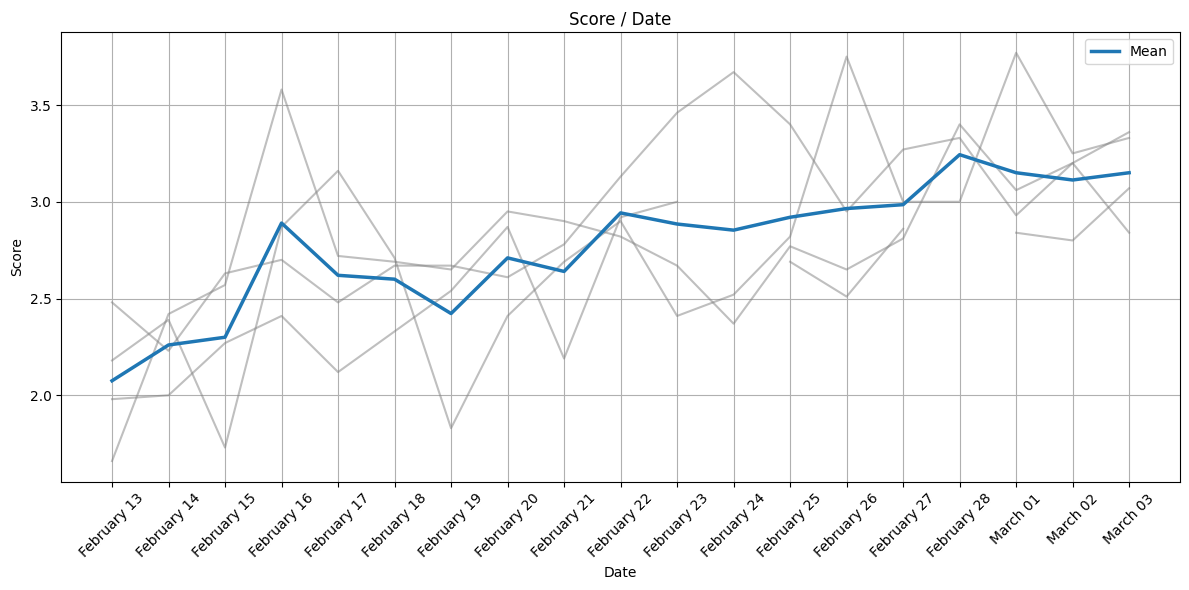

In [177]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 원시 데이터
data = score_rec_by_per

# 데이터프레임으로 변환
df = pd.DataFrame(data).T
df.columns.name = "Date"

# 날짜 정렬
df = df[df.columns.sort_values(key=lambda x: pd.to_datetime(x + " 2024"))]

# 평균 계산
df = df.apply(pd.to_numeric, errors='coerce')
mean_scores = df.mean(axis=0)

# Plotting
plt.figure(figsize=(12, 6))

# 모든 id별 선을 회색으로 그리기
for idx in df.index:
    plt.plot(df.columns, df.loc[idx], color='gray', alpha=0.5)

# 평균 선 그리기
plt.plot(df.columns, mean_scores, label='Mean', linewidth=2.5)

# 그래프 꾸미기
plt.title("Score / Date")
plt.xlabel("Date")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

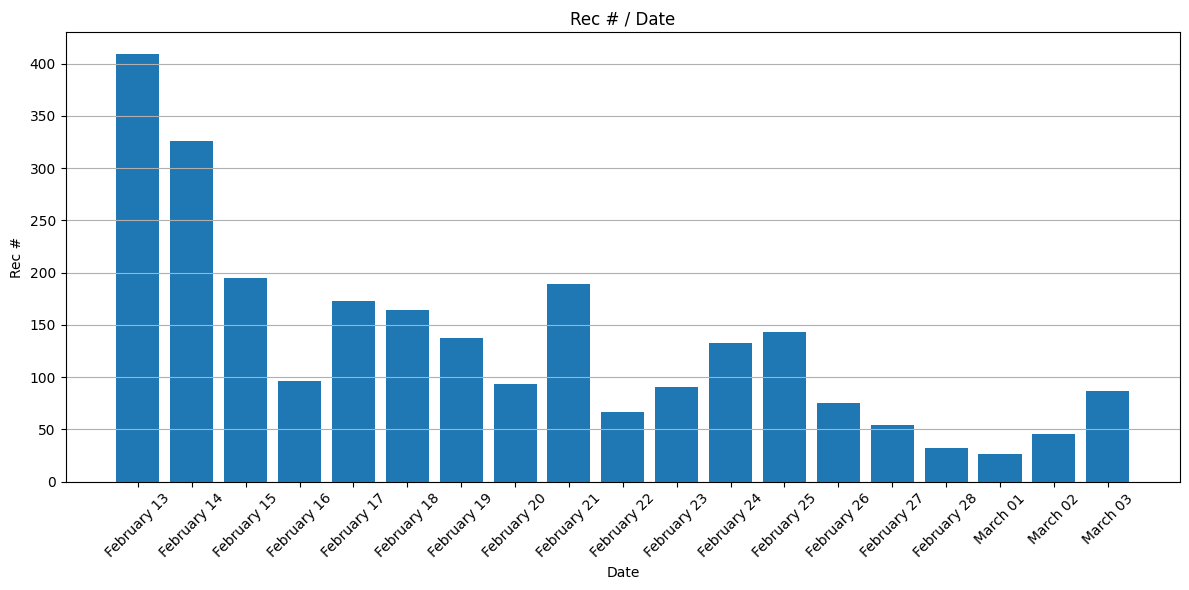

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# (1) 딕셔너리를 DataFrame으로 변환
df = pd.DataFrame(total_rec_by_per).T

# (2) 날짜 정렬을 위해 datetime으로 변환
sorted_columns = sorted(df.columns, key=lambda x: pd.to_datetime(x + " 2024"))
df = df[sorted_columns]

# (3) 날짜별 평균 계산
mean_scores = df.mean(axis=0)

# (4) 막대그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(mean_scores.index, mean_scores.values)

# (5) 그래프 꾸미기
plt.title("Rec # / Date")
plt.xlabel("Date")
plt.ylabel("Rec #")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

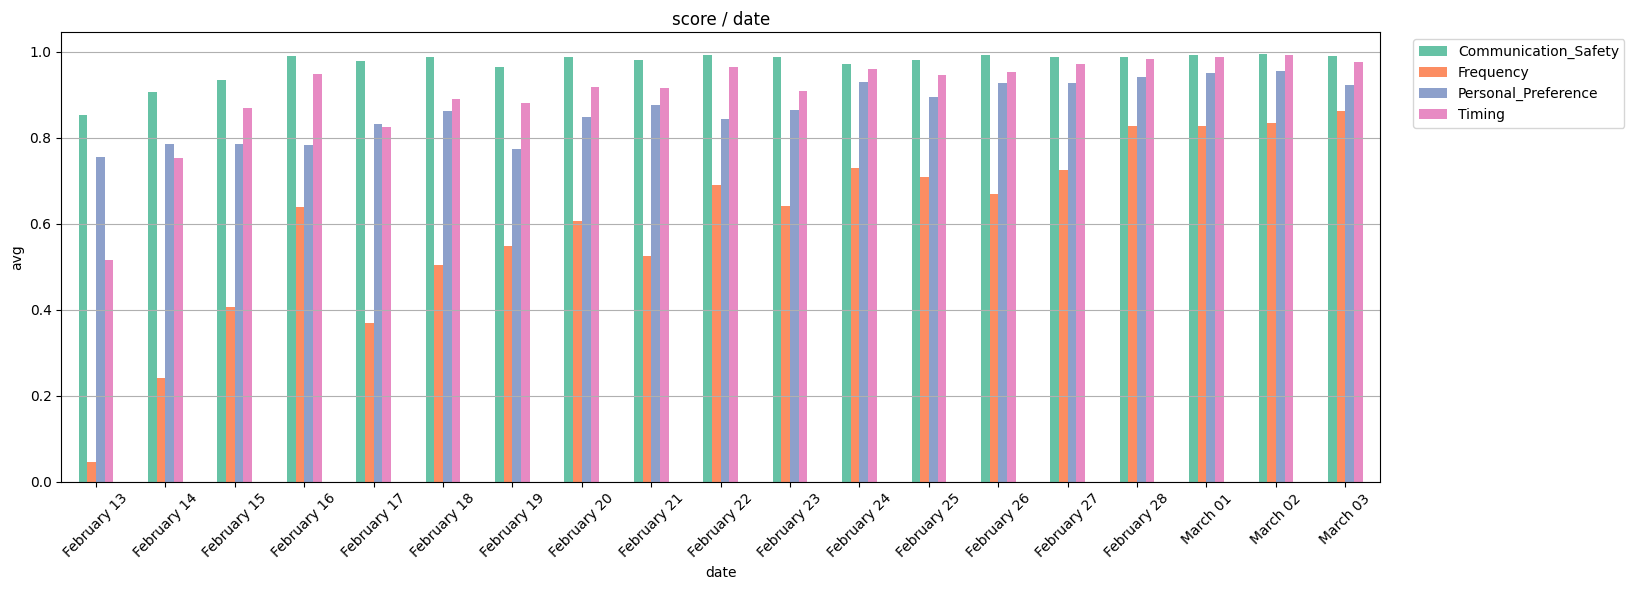

In [174]:
import seaborn as sns

records = []
for user_id, date_dict in crit_score_by_per.items():
    for date, criteria_scores in date_dict.items():
        for criterion, score in criteria_scores.items():
            records.append({
                "User_ID": user_id,
                "Date": date.split(', 2025')[0],
                "Criterion": criterion,
                "Score": score
            })

df = pd.DataFrame(records)

# 날짜순으로 정렬
df = df.sort_values("Date")

# 날짜별, 항목별 평균 계산
mean_scores = df.groupby(["Date", "Criterion"])["Score"].mean().unstack()

# Seaborn 색상 팔레트 사용 (더 보기 쉬운 색상 조합)
custom_palette = sns.color_palette("Set2", n_colors=mean_scores.shape[1])

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
mean_scores.plot(kind="bar", ax=ax, color=custom_palette)

ax.set_title("score / date")
ax.set_ylabel("avg")
ax.set_xlabel("date")
ax.legend(title="criteria")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y")

ax.legend(title="", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

In [81]:
score_data_by_per[per]

{'February 13': 2.52,
 'February 14': 2.41,
 'February 15': 2.89,
 'February 16': 3.61,
 'February 17': 3.69,
 'February 18': 3.71,
 'February 19': 3.61,
 'February 20': 3.77,
 'February 21': 3.4,
 'February 22': 3.29,
 'February 23': 3.53}

15


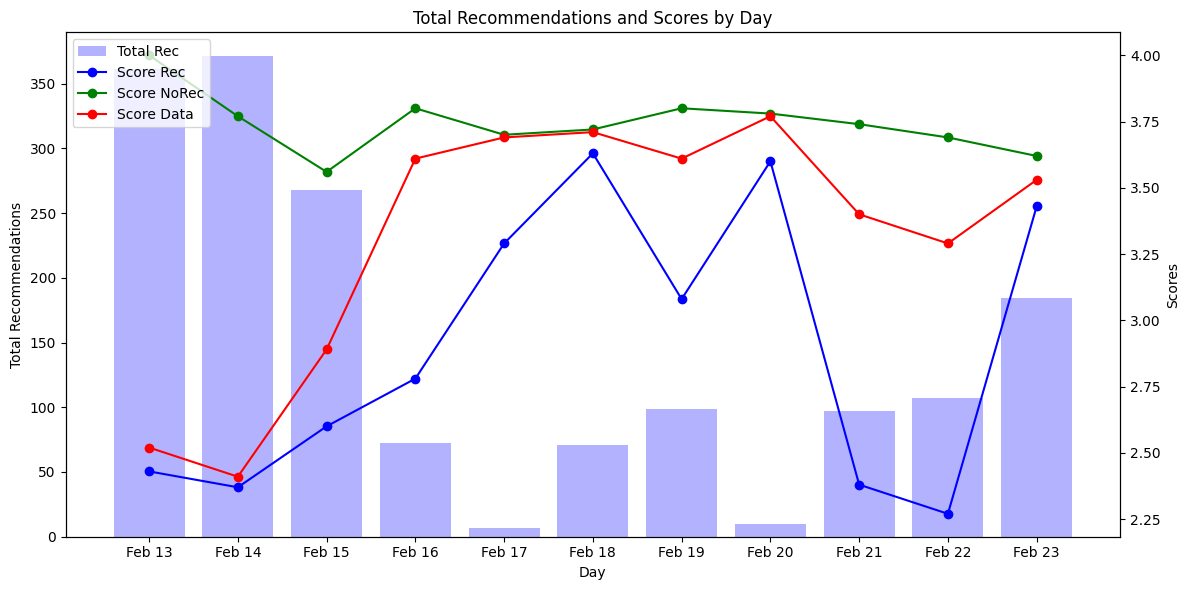

In [113]:
def process_scores(score_dict):
    return [None if score_dict[date] == 'None' else score_dict[date] for date in dates]

for id_, data_path in enumerate(path_list):
    per = data_path.split('evaltest_')[1].split('_cuda')[0]
    if id_ != 9:
        continue
    print(per)
    # 시각화 - 꺾은선 그래프 색상을 빨강, 파랑, 초록으로 지정
    fig, ax1 = plt.subplots(figsize=(12, 6))

    dates = list(score_rec_by_per[per])
    days_only = [date.replace('ruary', '') for date in dates]

    # 막대그래프 (투명한 파란색)
    ax1.bar(days_only, [total_rec_by_per[per][date] for date in dates], color='blue', alpha=0.3, label='Total Rec')

    # 꺾은선 그래프용 보조 y축
    ax2 = ax1.twinx()

    # 꺾은선 그래프들 (색상: 빨강, 파랑, 초록)
    score_rec_values = process_scores(score_rec_by_per[per])
    score_norec_values = process_scores(score_norec_by_per[per])
    score_data_values = process_scores(score_data_by_per[per])

    # ax2.plot(days_only, [score_rec_values[date] for date in dates], marker='o', color='blue', label='Score Rec')
    # ax2.plot(days_only, [score_norec_values[date] for date in dates], marker='o', color='green', label='Score NoRec')
    # ax2.plot(days_only, [score_data_values[date] for date in dates], marker='o', color='red', label='Score Data')
    ax2.plot(days_only, score_rec_values, marker='o', color='blue', label='Score Rec')
    ax2.plot(days_only, score_norec_values, marker='o', color='green', label='Score NoRec')
    ax2.plot(days_only, score_data_values, marker='o', color='red', label='Score Data')

    # 라벨 및 제목
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Total Recommendations')
    ax2.set_ylabel('Scores')

    # 범례
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # x축 라벨 회전
    plt.xticks(rotation=0)
    plt.title('Total Recommendations and Scores by Day')
    plt.tight_layout()
    plt.show()